# Problemas de distribución de probabilidad

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [115]:
from scipy.stats import binom,norm,uniform
import numpy as np

# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [116]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


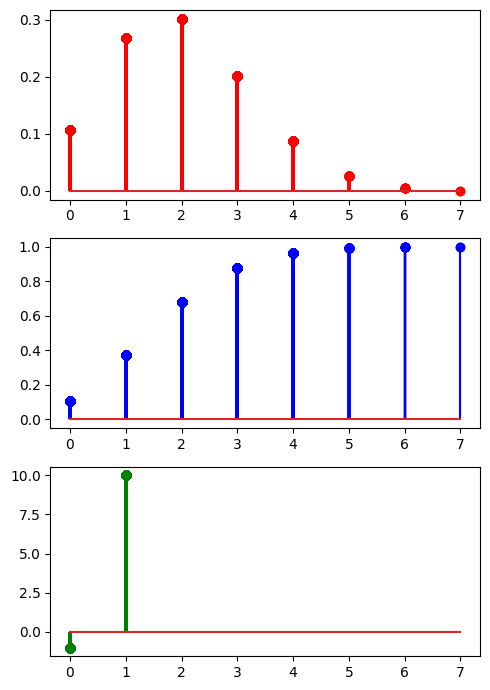

In [117]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1

Escriba las funciones anteriores pero para distribuciones normales y uniformes.

In [118]:
# TODO

def distribucionNormal(data,media=0,std=1):
   
    """
    Calcula la probabilidad de que la variable tome un valor en concreto.
    """

    result = norm.pdf(x=data,loc=media,scale=std)

    return result

def AcumulativoNorm(data, media=0,std=1):
    """
    Calcula las veces que la variable toma un valor en concreto
    
    """
    result = norm.cdf(x = data, loc=media, scale=std)

    return result

def CuantilNorm(data, media=0, std=1 ):
    """
    Calcula la función cuantil a partir de la distribución normal.
    """
    result = norm.ppf(q=data, loc=media, scale=std)

    return result

def RandomVariablesNorm(n, media=0, std=1):
    """
    Genera variables aleatorias a partir de la distribución normal.
    """
    result = norm.rvs(size=n,loc=media,scale=std)

    return result




In [119]:
def distribucionUniform(data,min=0,max=1):
   
    """
    Calcula la probabilidad de que la variable tome un valor en concreto.
    """

    result = uniform.pdf(x=data,loc=min,scale=(max-min))

    return result

def AcumulativoUniform(data,min=0,max=1):
    """
    Calcula las veces que la variable toma un valor en concreto
    
    """
    result = uniform.cdf(x = data, loc=min, scale=(max-min))

    return result

def CuantilUniform(data,min=0,max=1):
    """
    Calcula la función cuantil a partir de la distribución uniforme.
    """
    result = uniform.ppf(q=data, loc=min, scale=(max-min))

    return result

def RandomVariablesUniform(n, min=0,max=1):
    """
    Genera variables aleatorias a partir de la distribución uniforme.
    """
    result = uniform.rvs(loc=min,scale=(max-min),size=n)

    return result

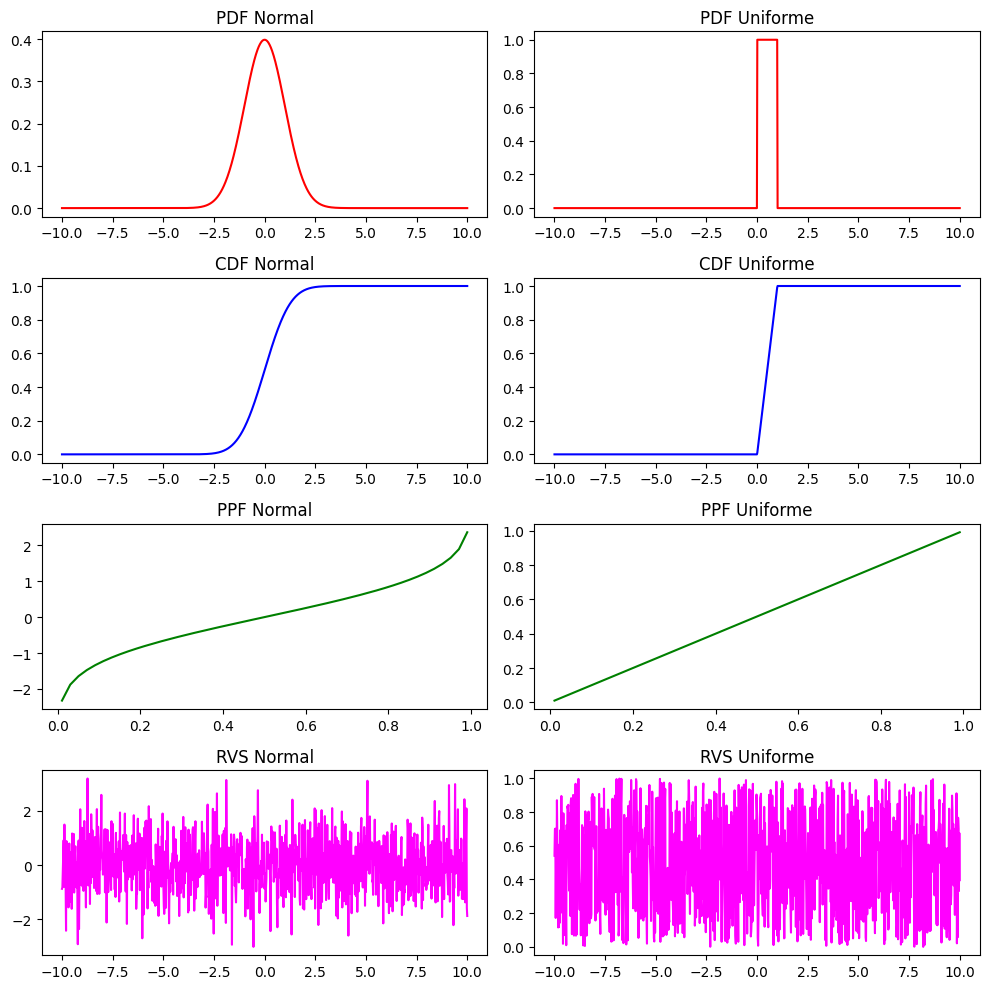

In [120]:
data=np.linspace(-10,10,1000)
x=1000

pdf=distribucionNormal(data)
cdf=AcumulativoNorm(data)
ppf=CuantilNorm(data)
rvs=RandomVariablesNorm(n=x)

pdfU=distribucionUniform(data)
cdfU=AcumulativoUniform(data)
ppfU=CuantilUniform(data)
rvsU=RandomVariablesUniform(n=x)


fig, axis = plt.subplots(4, 2, figsize = (10, 10))

axis[0][0].plot(data, pdf, "r-")
axis[0][0].set_title('PDF Normal')

axis[1][0].plot(data, cdf, "b-")
axis[1][0].set_title('CDF Normal')

axis[2][0].plot(data, ppf, "g-")
axis[2][0].set_title('PPF Normal')

axis[3][0].plot(data, rvs, "magenta")
axis[3][0].set_title('RVS Normal')

axis[0][1].plot(data, pdfU, "r-")
axis[0][1].set_title('PDF Uniforme')

axis[1][1].plot(data, cdfU, "b-")
axis[1][1].set_title('CDF Uniforme')

axis[2][1].plot(data, ppfU, "g-")
axis[2][1].set_title('PPF Uniforme')

axis[3][1].plot(data, rvsU, "magenta")
axis[3][1].set_title('RVS Uniforme')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()